# Lateral ventricle volume trajectories and response inhibition - feat
### (R-kernel)

2021, Arvid Lundervold

*Astri J. Lundervold, Alexandra Vik, Arvid Lundervold* <br>
**Lateral ventricle volume trajectories predict response inhibition in older age - a
longitudinal brain imaging and machine learning approach** <br>
 (to appear in PLOS ONE)

The linear mixed effect model (LME) was fitted to the data, i.e.

$$\text{Vol}_{ij} = \beta_0 + \beta_1 \text{Age}_{ij} + (b_{0i} + b_{1i} \text{Age}_{ij}) + \epsilon_{ij}$$

Here, $\text{Vol}_{ij}$ the continuous *response variable* in the model is volume of left (right) latreral ventricle in subject $i$ ($i=1,\ldots,N$) at wave $j$ ($j=1,\ldots,n_i$). In our case we have $N=74$ and three wase with complete data, i.e. $n_i=3$ for all $i$. $\text{Age}_{ij}$ is age (in years) of subject $j$ at wave $j$, and a *predictor variable* in the model.

The model parameterrs $\beta_0$ and $\beta_1$ are *fixed effects* parameters.  The variables $b_{0i}$ and $b_{1i}$ 
($i=1,\ldots,N$) are the *random effects* parameters, assumed to be normally distributed witrh zero mean. They denote individual deviations in intercept ($b_{0i}$) and slope ($b_{1i}$), respectiveley, from the group-level fixed effect.
Finally, the random residual errors $\epsilon_{ij}$ are assumed to be independent and normally distributed (i.i.d) with zero mean and constant variance $\sigma_\epsilon^2$.

**Select if eTIV-normalization of lateral ventricle volumes should be used or not**

In [1]:
eTIV_NORMALIZED = FALSE

In [2]:
library(tidyr)
library(dplyr)
library(GGally)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Packages and libraries

**`rpy2` should be tested through `0.0-test.ipynb`**

<img src="figs/Figure1.png" width="800">

In [3]:
fn_data = '../data/01_lvv_ri_renamed_data.csv'
df = read.csv(fn_data)
head(df)

,subj,gender,yrW1,yrW2,yrW3,left_lvvW1,left_lvvW2,left_lvvW3,right_lvvW1,right_lvvW2,right_lvvW3,eTIV,RI
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,subj_01,F,56.63,60.35,62.62,5321.4,5063.6,5368.3,6855.2,6729.2,7233.2,1232679,66
2,subj_02,M,49.07,52.58,55.05,11038.6,11912.2,12313.3,10611.6,11774.8,12070.5,1464692,85
3,subj_03,M,74.61,78.14,80.59,29718.4,32265.1,35887.0,34241.0,37155.2,41221.4,1385841,71
4,subj_04,M,56.23,59.78,62.68,21830.1,23933.6,26164.2,15243.9,16505.1,18509.1,1529445,41
5,subj_05,M,63.22,67.00,69.53,17205.1,16970.1,15858.1,13962.1,13755.5,13143.9,1371460,62
6,subj_06,F,60.51,64.29,66.82,14800.4,18814.5,19464.2,12281.2,16135.2,17163.3,1429970,89


In [4]:
#df['id'] = df['subj'].astype(str).str[-2:].astype(np.int)
#df.head()

## Model-based (lmer) feature design

<img src="figs/Fig_2_LME_derived_features.png" width="900">

**Read and explore the features**

In [5]:
# Read the lmer feature data to the present repository as .csv
if (eTIV_NORMALIZED){
    dfmri = read.csv(file = '../results/02_lvv_ri_new_R_lmer_feature_data_eTIV_norm.csv')

}else{
    dfmri = read.csv(file = '../results/02_lvv_ri_new_R_lmer_feature_data.csv')  
}

In [6]:
head(dfmri)

,Gender,Age3,b1iL,b1iR,VdevL,VdevR,RI3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,F,62.62,-403.1060,-255.83748,-7043.921,-5184.3248,66
2,M,55.05,-192.2795,18.44521,2022.834,1484.9150,85
3,M,80.59,504.1641,431.94848,9742.141,15864.7936,71
4,M,62.68,242.6547,143.70012,9671.261,3369.2981,41
5,M,69.53,-535.0672,-119.31520,1969.929,-1779.9775,62
6,F,66.82,300.5647,67.74603,1359.311,418.5232,89


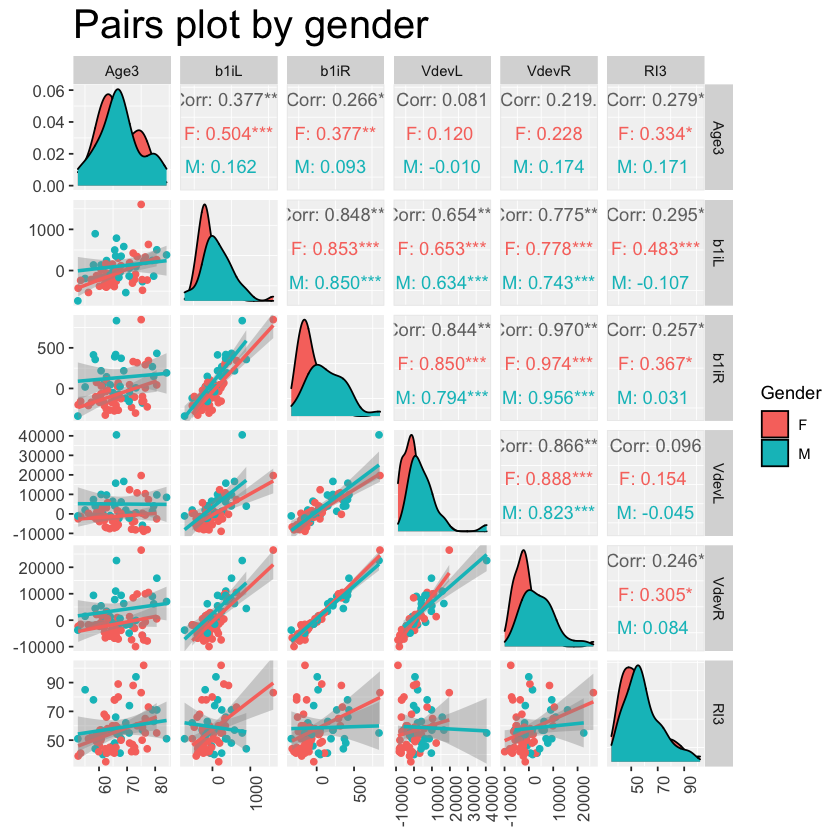

In [7]:
# %%R -i mydf -i eTIV_NORMALIZED

# 'RI3'


library(ggplot2)
library(GGally)

#data = mydf
data = dfmri

if (eTIV_NORMALIZED) {
pm <- ggpairs(
    data, mapping = aes(color = Gender), 
    title = "Pairs plot by gender (eTIV normalized)",
    legend = 1,
    columns = c('Age3','b1iL','b1iR', 'VdevL', 'VdevR', 'RI3'),
  lower = list(
    continuous = 'smooth'
  )) 
} else {
pm <- ggpairs(
    data, mapping = aes(color = Gender), 
    title = "Pairs plot by gender",
    legend = 1,
    columns = c('Age3','b1iL','b1iR', 'VdevL', 'VdevR', 'RI3'),
  lower = list(
    continuous = 'smooth'
  ))   
}

pm = pm + theme(axis.text.x = element_text(angle = 90, hjust = 1))

pm = pm + theme(
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10),
  legend.background = element_rect(fill = "white"),
  panel.grid.major = element_line(colour = NA),
#  panel.grid.minor = element_blank(),
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white"),
  panel.background = element_rect(fill = "grey95"),
  plot.title = element_text(size=24)
)

print(pm)

#         lower = list(
#     continuous = "smooth",
#     combo = ""facetdensity))



if (eTIV_NORMALIZED) {
ggsave("../figures/03_lvv_ri_new_R_ggplot_ggpairs_lmer_vdev_by_gender_eTIV_norm.pdf", width = 30, height = 30, units = "cm")
ggsave("./figs/03_lvv_ri__new_R_ggplot_ggpairs_lmer_vdev_by_gender_eTIV_norm.png", width = 30, height = 30, units = "cm")
} else {
ggsave("../figures/03_lvv_ri_new_R_ggplot_ggpairs_lmer_vdev_by_gender.pdf", width = 30, height = 30, units = "cm")
ggsave("./figs/03_lvv_ri_new_R_ggplot_ggpairs_lmer_vdev_by_gender.png", width = 30, height = 30, units = "cm")
}

<img src="figs/03_lvv_ri_new_R_ggplot_ggpairs_lmer_vdev_by_gender.png" width="900">

<img src="figs/03_lvv_ri__new_R_ggplot_ggpairs_lmer_vdev_by_gender_eTIV_norm.png" width="900">

In [8]:
head(dfmri)

,Gender,Age3,b1iL,b1iR,VdevL,VdevR,RI3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,F,62.62,-403.1060,-255.83748,-7043.921,-5184.3248,66
2,M,55.05,-192.2795,18.44521,2022.834,1484.9150,85
3,M,80.59,504.1641,431.94848,9742.141,15864.7936,71
4,M,62.68,242.6547,143.70012,9671.261,3369.2981,41
5,M,69.53,-535.0672,-119.31520,1969.929,-1779.9775,62
6,F,66.82,300.5647,67.74603,1359.311,418.5232,89


In [9]:
#mydfx = mydf.drop(['Gender', 'id'], axis=1)
#mydfx.head()
drops <- c("Gender")
mydfx = dfmri[ , !(names(dfmri) %in% drops)]
head(mydfx)

,Age3,b1iL,b1iR,VdevL,VdevR,RI3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,62.62,-403.1060,-255.83748,-7043.921,-5184.3248,66
2,55.05,-192.2795,18.44521,2022.834,1484.9150,85
3,80.59,504.1641,431.94848,9742.141,15864.7936,71
4,62.68,242.6547,143.70012,9671.261,3369.2981,41
5,69.53,-535.0672,-119.31520,1969.929,-1779.9775,62
6,66.82,300.5647,67.74603,1359.311,418.5232,89


In [10]:
datax = mydfx
cormat <- cor(datax, method = c("pearson"))
print(cormat)

            Age3      b1iL      b1iR      VdevL     VdevR        RI3
Age3  1.00000000 0.3769067 0.2657216 0.08111722 0.2194872 0.27936368
b1iL  0.37690665 1.0000000 0.8481796 0.65412109 0.7745020 0.29509884
b1iR  0.26572161 0.8481796 1.0000000 0.84398517 0.9700807 0.25673614
VdevL 0.08111722 0.6541211 0.8439852 1.00000000 0.8655406 0.09631501
VdevR 0.21948720 0.7745020 0.9700807 0.86554059 1.0000000 0.24581346
RI3   0.27936368 0.2950988 0.2567361 0.09631501 0.2458135 1.00000000


### Spaghetti plot in R of LVV trajectories labelled with RI3 ('fast', 'medium', 'slow')

In [11]:
# Read the lmer feature data to the present repository as .csv
if (eTIV_NORMALIZED){
    dfL = read.csv(file = '../results/03_lvv_ri_new_LH_longitudinal_label_eTIV_norm.csv')

}else{
    dfL = read.csv(file = '../results/03_lvv_ri_new_LH_longitudinal_label.csv')  
}

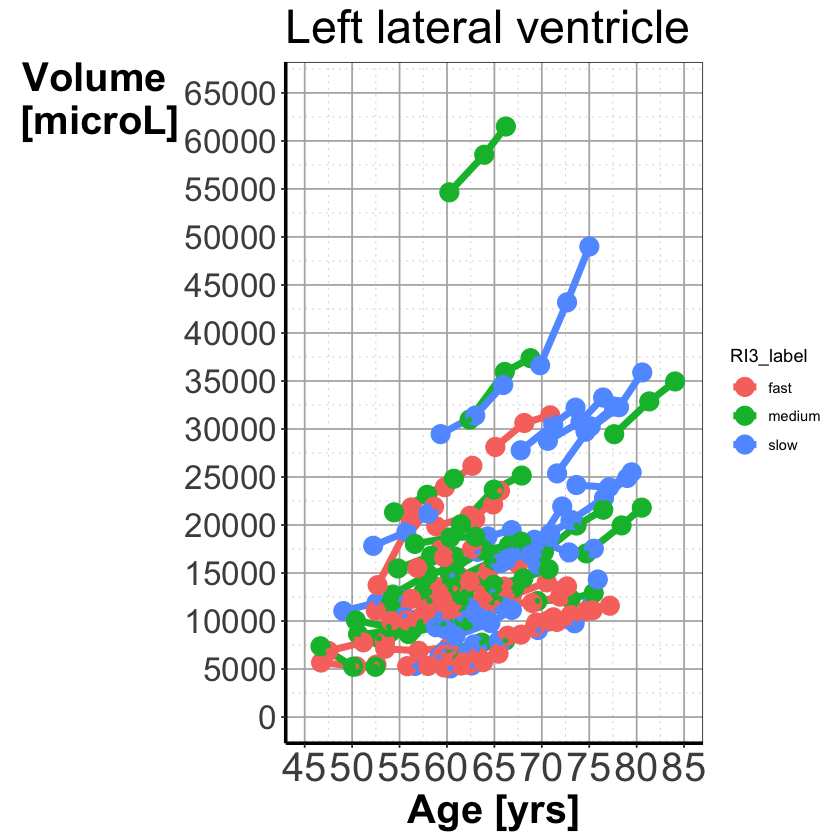

In [12]:
# %%R -i dfL -i eTIV_NORMALIZED


# Left lateral ventricle

if (eTIV_NORMALIZED) {
title.1.L <- "Left lateral ventricle (eTIV normalized)"
} else {
df <-  dfL

title.1.L <- "Left lateral ventricle"

mytitle <- title.1.L

g11 <- ggplot(data = df, aes(x = Age, y = Volume, group = Subject, colour = factor(RI3_label))) + geom_line(size=2)
g11 <- g11 + scale_colour_discrete(name  ="RI3_label") + geom_point(pch=19, size = 5)
myX <- scale_x_continuous(limits = c(45, 85), breaks = seq(45, 85, 5), name = "Age [yrs]")
myY <- scale_y_continuous(limits = c(500, 65000), breaks = seq(0, 65000, 5000), name = "Volume\n [microL]") 

g11 <- g11 + geom_point(size = 1.0) + theme_bw() + myX + myY
g11 <- g11 + labs(title = mytitle, fontsize = 32)
# Set title to twice the base font size
g11 <- g11 + theme(plot.title = element_text(size = rel(2.0)))
g11 <- g11 + theme(axis.line = element_line(size = 1, colour = "black", linetype = "solid"))
g11 <- g11 + theme(axis.text = element_text(size = rel(1.5)))
g11 <- g11 + theme(axis.title.y = element_text(size = rel(1.8), angle = 0))
g11 <- g11 + theme(axis.title.x = element_text(size = rel(1.8), angle = 0))
g11 <- g11 + theme(panel.grid.major = element_line(colour = "gray70"))
g11 <- g11 + theme(panel.grid.minor = element_line(colour = "gray80", linetype = "dotted"))
g11 <- g11 + theme(plot.background = element_rect(fill = "white"))

g11 <- g11 + theme(axis.text.x=element_text(size=24), axis.title.x=element_text(size=24,face="bold"))
g11 <- g11 + theme(axis.text.y=element_text(size=20), axis.title.y=element_text(size=24,face="bold"))
g11 <- g11 + theme(plot.title = element_text(size=28))

print(g11)
    
ggsave("../figures/03_lvv_ri_new_R_left_ventricle_by_RI3_label.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/03_lvv_ri_new_R_left_ventricle_by_RI3_label.png", width = 40, height = 30, units = "cm")
}

<img src="figs/03_lvv_ri_new_R_left_ventricle_by_RI3_label.png" width="900">

In [13]:
# Read the lmer feature data to the present repository as .csv
if (eTIV_NORMALIZED){
    dfR = read.csv(file = '../results/03_lvv_ri_new_RH_longitudinal_label_eTIV_norm.csv')

}else{
    dfR = read.csv(file = '../results/03_lvv_ri_new_RH_longitudinal_label.csv')  
}

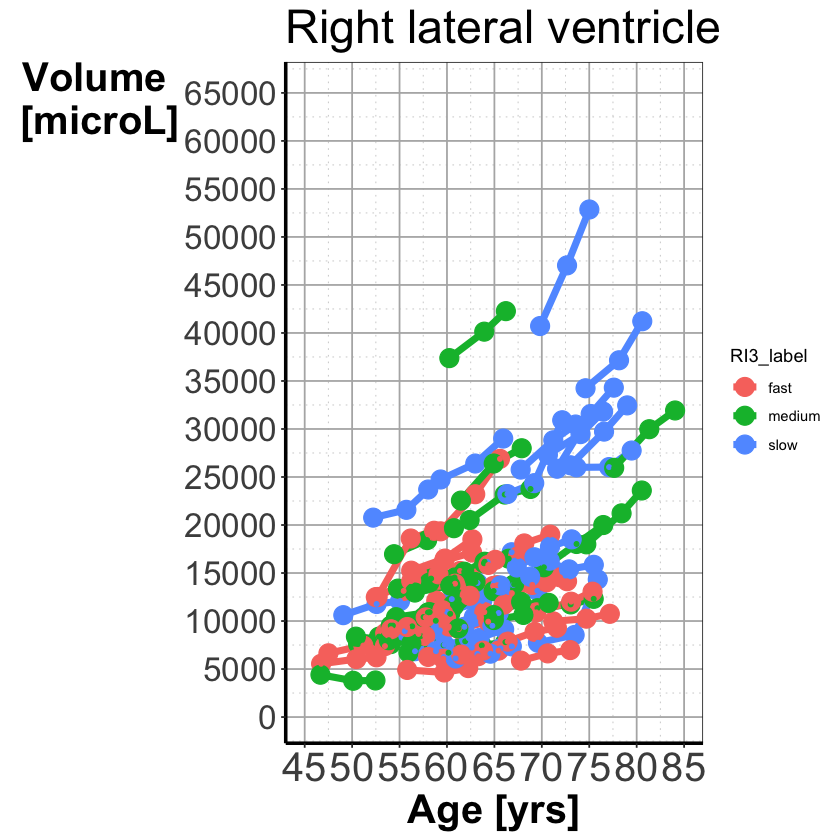

In [14]:
# %%R -i dfR -i eTIV_NORMALIZED

# Right lateral ventricle

if (eTIV_NORMALIZED) {
title.1.R <- "Right lateral ventricle (eTIV normalized)"
} else {
df <-  dfR

title.1.R <- "Right lateral ventricle"

mytitle <- title.1.R

g11 <- ggplot(data = df, aes(x = Age, y = Volume, group = Subject, colour = factor(RI3_label))) + geom_line(size=2)
g11 <- g11 + scale_colour_discrete(name  ="RI3_label") + geom_point(pch=19, size = 5)
myX <- scale_x_continuous(limits = c(45, 85), breaks = seq(45, 85, 5), name = "Age [yrs]")
myY <- scale_y_continuous(limits = c(500, 65000), breaks = seq(0, 65000, 5000), name = "Volume\n [microL]") 

g11 <- g11 + geom_point(size = 1.0) + theme_bw() + myX + myY
g11 <- g11 + labs(title = mytitle, fontsize = 32)
# Set title to twice the base font size
g11 <- g11 + theme(plot.title = element_text(size = rel(2.0)))
g11 <- g11 + theme(axis.line = element_line(size = 1, colour = "black", linetype = "solid"))
g11 <- g11 + theme(axis.text = element_text(size = rel(1.5)))
g11 <- g11 + theme(axis.title.y = element_text(size = rel(1.8), angle = 0))
g11 <- g11 + theme(axis.title.x = element_text(size = rel(1.8), angle = 0))
g11 <- g11 + theme(panel.grid.major = element_line(colour = "gray70"))
g11 <- g11 + theme(panel.grid.minor = element_line(colour = "gray80", linetype = "dotted"))
g11 <- g11 + theme(plot.background = element_rect(fill = "white"))

g11 <- g11 + theme(axis.text.x=element_text(size=24), axis.title.x=element_text(size=24,face="bold"))
g11 <- g11 + theme(axis.text.y=element_text(size=20), axis.title.y=element_text(size=24,face="bold"))
g11 <- g11 + theme(plot.title = element_text(size=28))

print(g11)
    
ggsave("../figures/03_lvv_ri_new_R_right_ventricle_by_RI3_label.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/03_lvv_ri_new_R_right_ventricle_by_RI3_label.png", width = 40, height = 30, units = "cm")
}

<img src="figs/03_lvv_ri_new_R_right_ventricle_by_RI3_label.png" width="900">